<a href="https://colab.research.google.com/github/jegazhu/python-projects/blob/main/HR_Analytics_Prediction_Why_do_People_Resign%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/HR-Employee-Attrition.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [75]:
data=pd.read_csv('/content/sample_data/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Calculating the attrition rate:**

---



In [76]:
attrition_rate = data['Attrition'].value_counts() / len(data)
print(f"Attrition rate: \n{attrition_rate}")

Attrition rate: 
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


**Exploratory Data Analysis (EDA)**: You can use various Visualization techniques to understand the relationship between attrition and other variables.

---


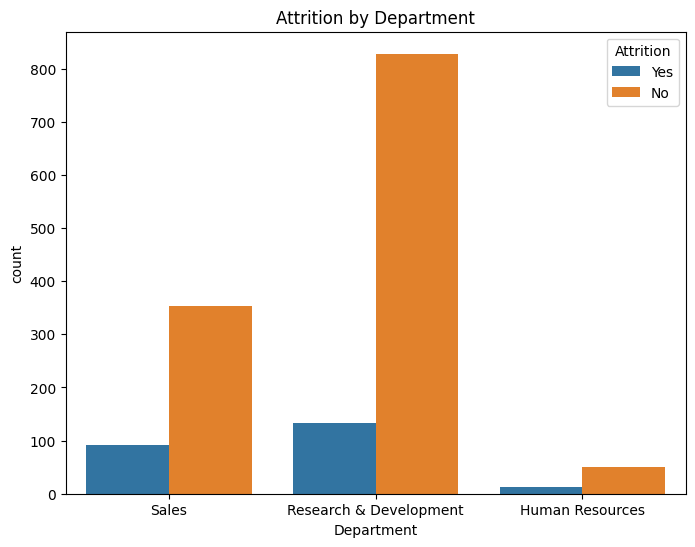

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.show()


In [77]:
# Group the data by 'Age' and 'Attrition', then count the number of instances
attrition_by_age = data.groupby(['Age', 'Attrition', 'Department']).size()

# Calculate the attrition rate by age
attrition_rate_by_age = attrition_by_age / data.groupby('Age').size()

# Format the attrition rate as a percentage
attrition_rate_by_age_percentage = attrition_rate_by_age.apply(lambda x: '{:.1%}'.format(x))

# Print the attrition rate by age
print(f"Attrition rate by age: \n{attrition_rate_by_age_percentage}")


Attrition rate by age: 
Age  Attrition  Department            
18   No         Research & Development    37.5%
                Sales                     12.5%
     Yes        Research & Development    25.0%
                Sales                     25.0%
19   No         Research & Development    33.3%
                                          ...  
59   No         Human Resources           20.0%
                Research & Development    40.0%
                Sales                     40.0%
60   No         Research & Development    40.0%
                Sales                     60.0%
Length: 192, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



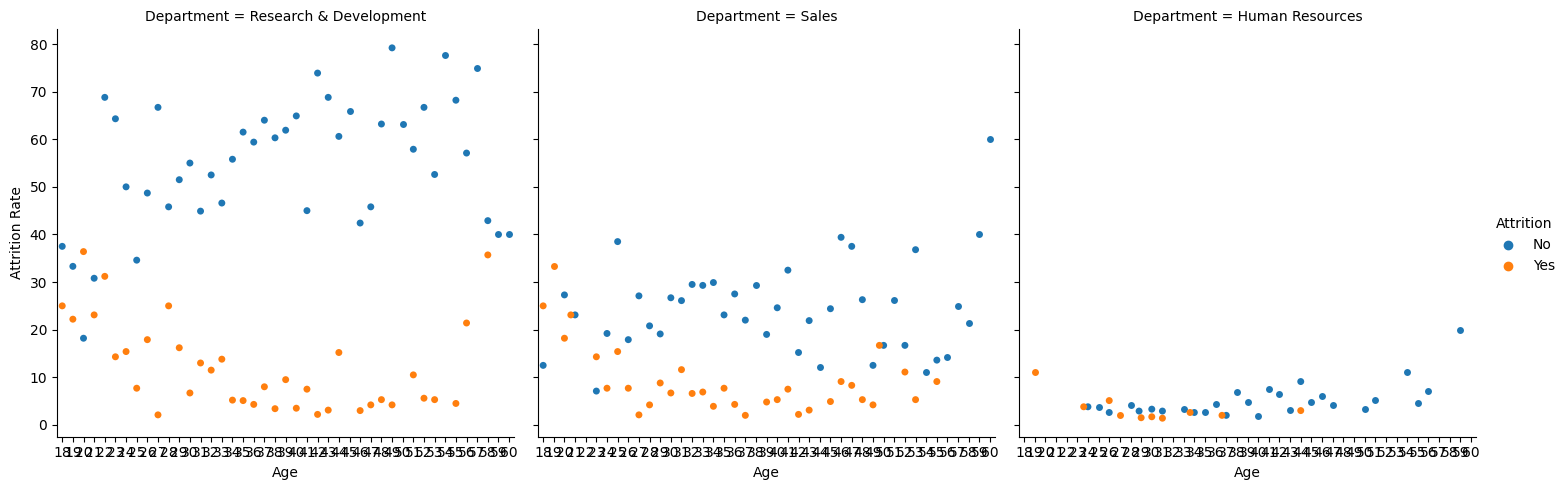

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of your DataFrame so 'Age', 'Attrition', and 'Department' become columns
attrition_rate_by_age_percentage = attrition_rate_by_age_percentage.reset_index()

# Rename the 0 column to 'Attrition Rate'
attrition_rate_by_age_percentage = attrition_rate_by_age_percentage.rename(columns={0: 'Attrition Rate'})

# Convert 'Attrition Rate' to float
attrition_rate_by_age_percentage['Attrition Rate'] = attrition_rate_by_age_percentage['Attrition Rate'].str.rstrip('%').astype('float')

# Create the catplot
sns.catplot(x='Age', y='Attrition Rate', hue='Attrition', col='Department', data=attrition_rate_by_age_percentage, kind='swarm')

# Show the plot
plt.show()


In [6]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [7]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

In [19]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

In [8]:
dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

In [10]:
import plotly.express as px

sats_att = data.groupby(['EnvironmentSatisfaction', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Change px.area to px.bar
fig = px.bar(sats_att, x='EnvironmentSatisfaction', y='Counts', color='Attrition',
             title='Environment Satisfaction level Counts of People in an Organization')

fig.show()


In [12]:
import plotly.express as px

stock_att = data.groupby(['StockOptionLevel', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.bar(stock_att, x='StockOptionLevel', y='Counts', color='Attrition',
             title='Stock facilities level wise People in an Organization',
             barmode='group')  # Add barmode parameter to create a grouped bar chart

fig.show()

In [13]:
import plotly.express as px

wlb_att = data.groupby(['WorkLifeBalance', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Change 'px.bar' to 'px.bar' with 'barmode' as 'group'
fig_grouped = px.bar(wlb_att, x='WorkLifeBalance', y='Counts', color='Attrition',
                     title='Work Life Balance level Counts of People in an Organization',
                     barmode='group')

# Show the plot
fig_grouped.show()

In [14]:
import plotly.express as px

ncwrd_att = data.groupby(['NumCompaniesWorked', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Change 'px.area' to 'px.line'
fig = px.line(ncwrd_att, x='NumCompaniesWorked', y='Counts', color='Attrition',
              title='Work Experience level Counts of People in an Organization')

# Show the plot
fig.show()

In [16]:
import plotly.express as px

yrscr_att = data.groupby(['YearsInCurrentRole', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.bar(yrscr_att, x='YearsInCurrentRole', y='Counts', color='Attrition',
             title='Counts of People working for years in an Organization',
             labels={'Counts': 'Number of People', 'YearsInCurrentRole': 'Years in Current Role'})

fig.show()


<ipython-input-31-b0dcbc14a35c>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



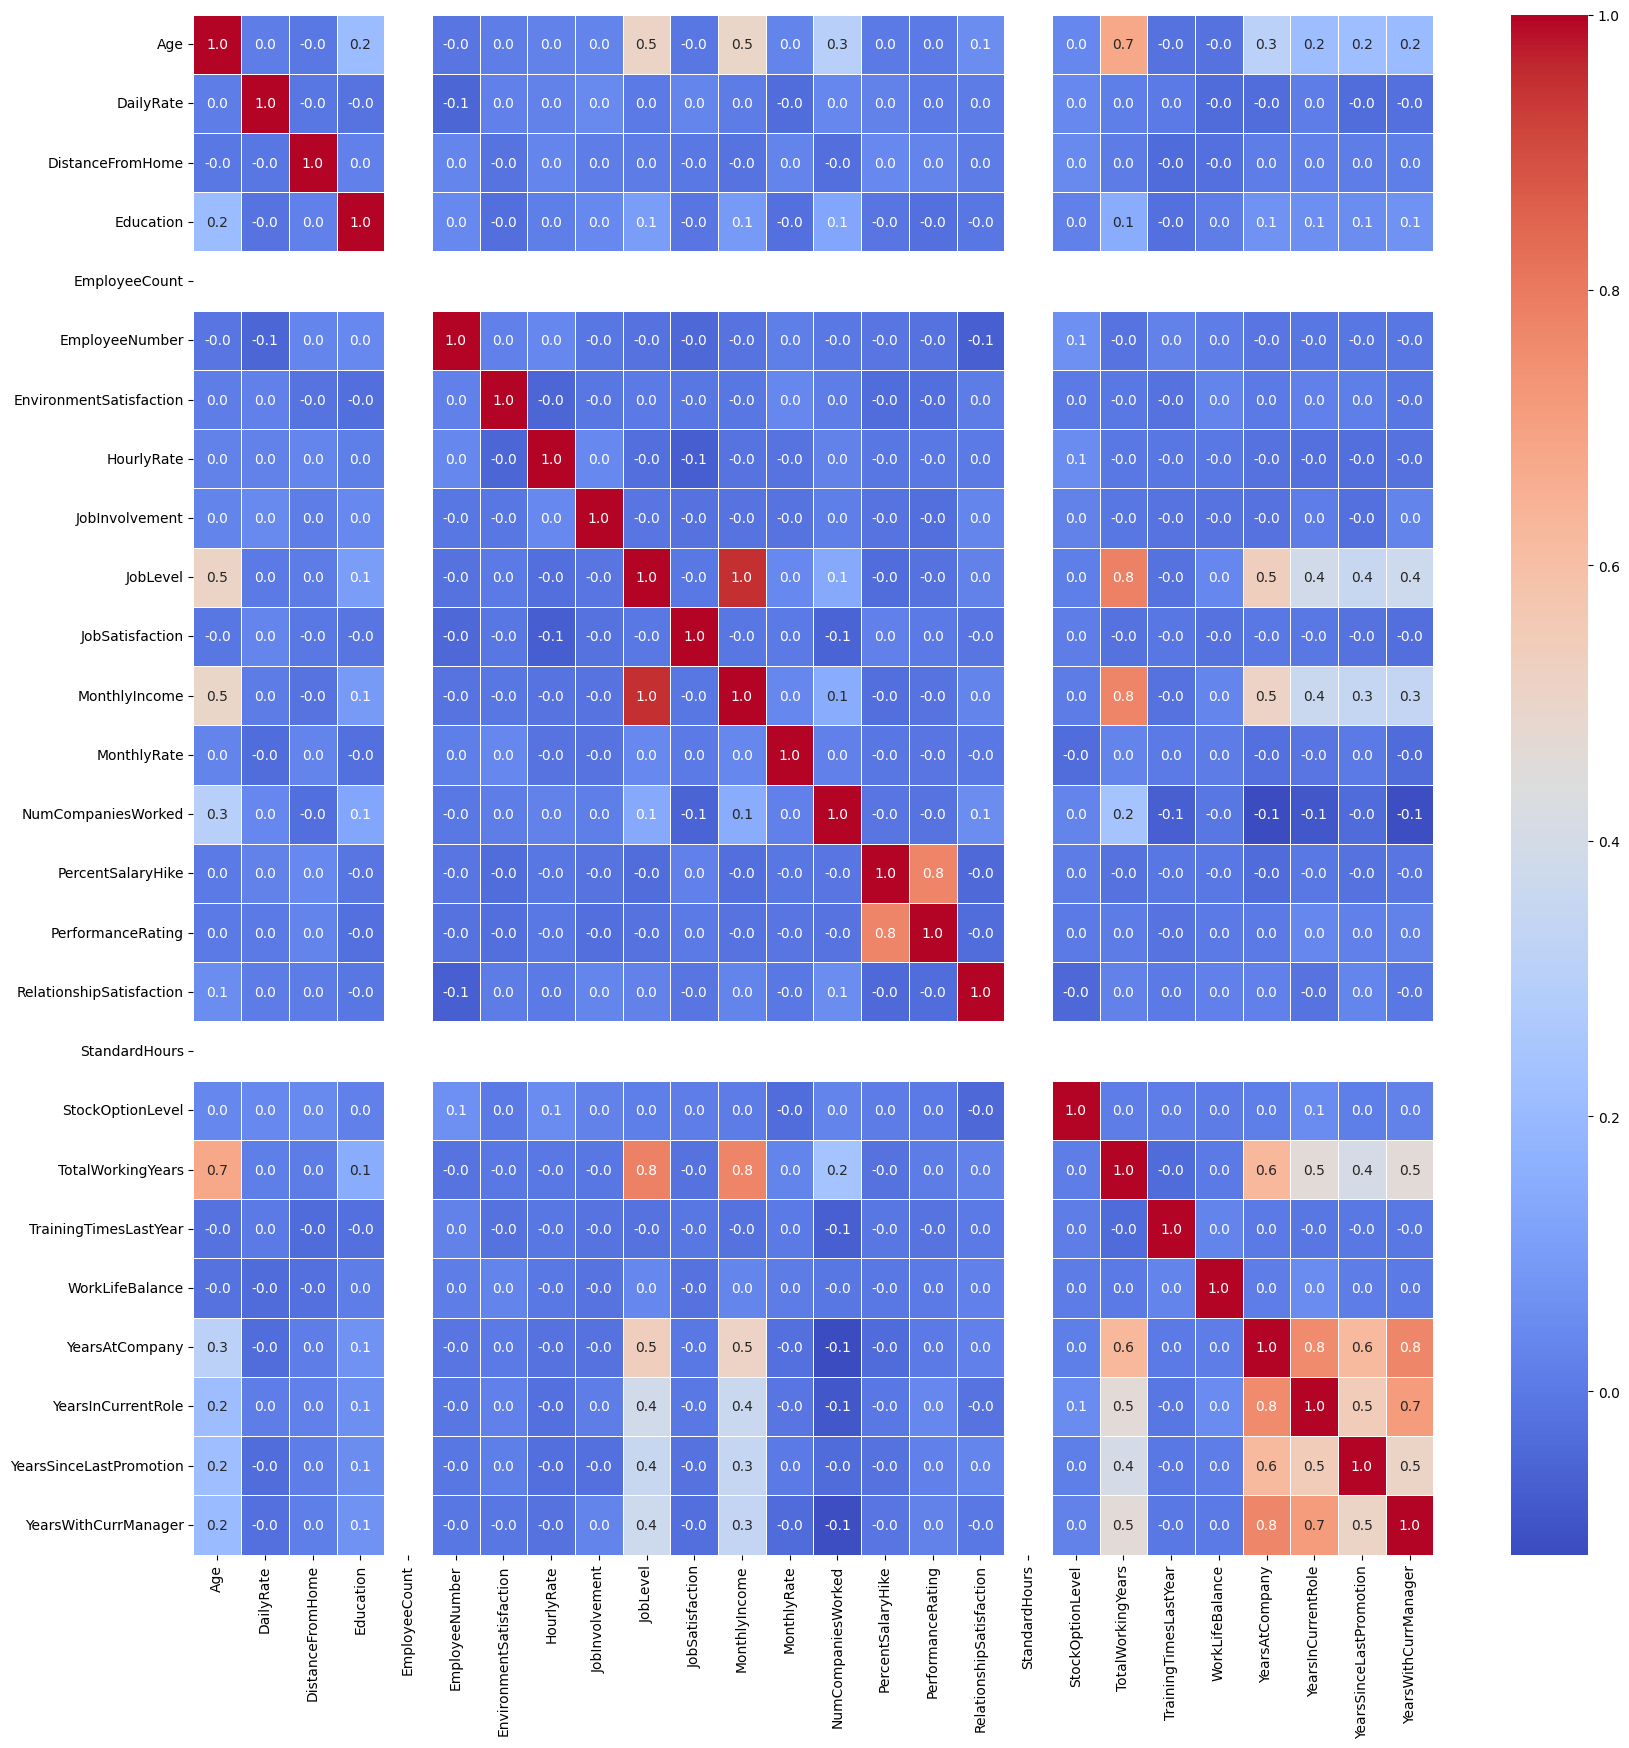

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='coolwarm')

plt.show()


In [32]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.857
Test Model accruracy scores: 0.840
--------------------------------------------------------------------------


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px

# Assuming 'data' is your original DataFrame

# One-Hot Encoding
data_dummies = pd.get_dummies(data)

# Feature Selection
features = data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]

# Splitting Data
X = features.values
y = data_dummies[['Attrition_Yes']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Logistic Regression Model
log_reg = LogisticRegression(C=1000, max_iter=10000)
log_reg.fit(X_train, y_train)

# Print Model Accuracy Scores
training_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Training Model accuracy scores: {:.1%}'.format(training_accuracy))
print('Test Model accuracy scores: {:.1%}'.format(test_accuracy))
print('--------------------------------------------------------------------------')

# Create a Donut Chart with Custom Colors and Training Accuracy in the center
y_pred_test = log_reg.predict(X_test)
donut_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Use a custom color palette
color_palette = ['#03318c', '#a4b9db']  # Custom colors for 'Yes' and 'No'

# Create a figure with a donut chart and training accuracy in the center
donut_chart = px.pie(donut_data, names='Actual', title='Actual Attrition Distribution',
                    hole=0.8, color_discrete_sequence=color_palette)

# Add the Training Accuracy in the center as an annotation
donut_chart.add_annotation(
    text=f'{test_accuracy:.0%}',
    x=0.5, y=0.5, font=dict(size=50), showarrow=False
)

donut_chart.show()


--------------------------------------------------------------------------
Logistic Regression:
Training Model accuracy scores: 89.1%
Test Model accuracy scores: 89.4%
--------------------------------------------------------------------------


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px

# Assuming 'data' is your original DataFrame

# One-Hot Encoding
data_dummies = pd.get_dummies(data)

# List of departments
departments = ['Department_Human Resources', 'Department_Research & Development', 'Department_Sales']

for dept in departments:
    # Select data for the current department
    dept_data = data_dummies[data_dummies[dept] == 1]

    # Feature Selection
    features = dept_data.drop(['Attrition_No', 'Attrition_Yes'], axis=1)

    # Splitting Data
    X = features.values
    y = dept_data[['Attrition_Yes']].values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Logistic Regression Model
    log_reg = LogisticRegression(C=1000, max_iter=10000)
    log_reg.fit(X_train, y_train)

    # Print Model Accuracy Scores
    training_accuracy = log_reg.score(X_train, y_train)
    test_accuracy = log_reg.score(X_test, y_test)

    print('--------------------------------------------------------------------------')
    print(f'Logistic Regression for {dept}:')
    print('Training Model accuracy scores: {:.1%}'.format(training_accuracy))
    print('Test Model accuracy scores: {:.1%}'.format(test_accuracy))
    print('--------------------------------------------------------------------------')

    # Create a Donut Chart with Custom Colors and Training Accuracy in the center
    y_pred_test = log_reg.predict(X_test)
    donut_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

    # Use a custom color palette
    color_palette = ['#03318c', '#a4b9db']  # Custom colors for 'Yes' and 'No'

    # Create a figure with a donut chart and training accuracy in the center
    donut_chart = px.pie(donut_data, names='Actual', title=f'Actual Attrition Distribution for {dept}',
                        hole=0.8, color_discrete_sequence=color_palette)

    # Add the Training Accuracy in the center as an annotation
    donut_chart.add_annotation(
        text=f'{test_accuracy:.0%}',
        x=0.5, y=0.5, font=dict(size=50), showarrow=False
    )

    donut_chart.show()


--------------------------------------------------------------------------
Logistic Regression for Department_Human Resources:
Training Model accuracy scores: 100.0%
Test Model accuracy scores: 93.8%
--------------------------------------------------------------------------


--------------------------------------------------------------------------
Logistic Regression for Department_Research & Development:
Training Model accuracy scores: 89.0%
Test Model accuracy scores: 90.9%
--------------------------------------------------------------------------


--------------------------------------------------------------------------
Logistic Regression for Department_Sales:
Training Model accuracy scores: 89.2%
Test Model accuracy scores: 89.3%
--------------------------------------------------------------------------


Based on the results of the logistic regression models for each department, here are some key insights:

**1. Department Human Resources**

The model received a perfect accuracy score of 100% on the training data, indicating that it could completely match the data. However, the test accuracy score is somewhat lower (93.8%), indicating that the model may be overfitting to the training data. Overfitting occurs when a model learns the detail and noise in training data to the point where it severely affects the model's performance on new data.

**2. Department_Research & Development**

The model had an accuracy score of 89.0% on training data and 90.9% on test data. The fact that the test accuracy exceeds the training accuracy indicates that the model generalizes effectively to new data and is not overfitting.

**3. Department_Sales**

The model achieved similar accuracy ratings on training and test data (89.2% and 89.3%, respectively), indicating that the model is operating consistently and is unlikely to be overfitting.


Finally, logistic regression models appear to be effective in forecasting staff attrition for each department. However, the Human Resources department's model may be overfitting and might be improved through regularization or the use of a simpler model. The models for the R&D and Sales departments appear to generalize well to new data. These models could be used to identify employees at risk of leaving and to guide interventions to increase employee retention. As always, keep in mind that these models are only as strong as the data on which they were trained, and their forecasts should be used in conjunction with a larger plan for managing staff attrition.